In [29]:
from sklearn import datasets 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#导入数据
boston = datasets.load_boston()
data =pd.DataFrame(data=boston.data,columns=boston.feature_names)
#查看所有数据
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [5]:
#保存数据
data.to_csv('./boston.csv', index=None)


In [11]:
#进行数据预处理
#按照第一列进行排序
data.sort_values(by=['CRIM'], ascending=False,inplace=True) 

#筛选出任何含有缺失值的数据
data[data.isnull().values==True]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [12]:
#统计CRIM列缺失值的数量
data['CRIM'].isnull().value_counts()

False    506
Name: CRIM, dtype: int64

In [13]:
#筛选出CRIM列含有缺失值的数据
data[data['CRIM'].isnull().values==True]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [17]:
#插入一列three_sigma又来表示是否是异常值
data['three_sigma'] = data['CRIM'].transform( lambda x: (x.mean()-3*x.std()>x)|(x.mean()+3*x.std()<x))

#筛选出目标变量的异常值
data[data['three_sigma']==True]

#保留正常的数据
correct_data=data[data['three_sigma']==False]


In [23]:
#进行数据分析
#通过定义一个函数，来查看数据的集中趋势
def f(x):
    return pd.DataFrame([x.mean(),x.median(),x.mode(),x.quantile(0.25),x.quantile(0.75)],
    index=['mean','median','mode','Q1','Q3'])

#调用函数
f(data['DIS'])


,0
mean,3.795043
median,3.20745
mode,0 3.4952 dtype: float64
Q1,2.100175
Q3,5.188425


In [26]:
#定义一个函数，来查看数据的分布
def g(x):
    return pd.DataFrame([x.skew(),x.kurt()],
                        index=['skew','kurt'])

#调用函数
g(data['CRIM'])

,0
skew,5.223149
kurt,37.130509


In [30]:
# 描述性统计分析
describe = data.describe().T
print(describe)


         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

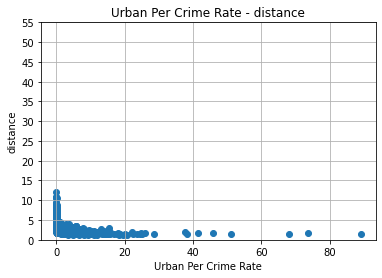

In [33]:
def drawing(x,y,xlabel):
    plt.scatter(x,y)
    plt.title('%s - distance'% xlabel)
    plt.xlabel(xlabel)
    plt.ylabel('distance')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

# 绘制变量CRIM和因变量的散点图
drawing(data['CRIM'],data['DIS'],'Urban Per Crime Rate')
